In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

seed = 42

# Data Preparation


- Loadng data.


- Investigate data shape, data types, missing values, and basic statisics.

In [4]:
data = pd.read_csv("DS_MiniProject_ANON.csv")
pd.set_option('display.max_columns', 500)
print "Data Shape:", data.shape, "\n"
print "Data Dtypes:\n", data.dtypes, "\n"
print "Missing Values:\n", data.isnull().sum(), "\n"
for var in data:
    print data[var].unique().shape[0], "unique Values of", var, data[var].unique(), "\n"

Data Shape: (130086, 29) 

Data Dtypes:
DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment           object
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dty

There are 809 missing values in data. These missing data will be removed from the data set.

In [5]:
data.dropna(inplace=True)
print "Data Shape:", data.shape, "\n"
print "Event ratio in Call_Flag:", float(data.Call_Flag.sum())/float(data.Call_Flag.shape[0]), "\n"
data.describe()

Data Shape: (129277, 29) 

Event ratio in Call_Flag: 0.0365494248784 



,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.0,129277.000000,129277.000000,129277.000000,129277.000000
mean,8.591581,48.813929,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,0.106825,0.477254,0.408247,0.197885,0.285333,0.914494,2.427145,0.056019,0.080502,0.0,0.193522,0.953774,0.131284,0.036549
std,7.297798,14.037131,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,0.527858,1.007308,0.960339,0.608286,0.850155,1.388627,1.211655,0.229960,0.272069,0.0,0.509437,2.149006,0.337712,0.187654
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.252567,37.845311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.111567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,11.630390,58.830938,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,6.000000,36.000000,16.000000,10.000000,16.000000,36.000000,36.000000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


Plot Tenure data distribution and boxplot. 

Tenure data is skewed. Log transformation is applied to this data variable.

No matter whether applying log transformation or not, there are too many outliers in this data variable. Also outliers are on the left side of the distribution for the log transformed Tenure variable, which shouldn't be removed. Therefore I'm not going to remove any outliers from Tenure variable.

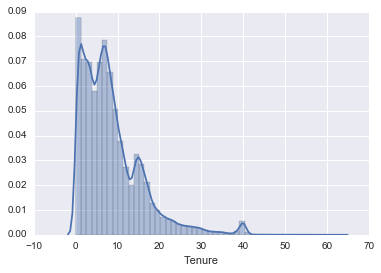

In [239]:
sns.distplot(data.Tenure)

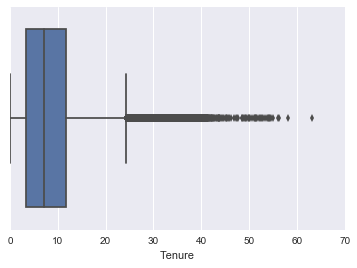

In [158]:
sns.boxplot(data.Tenure)

In [159]:
Q1 = np.percentile(data.Tenure, 25)
Q3 = np.percentile(data.Tenure, 75)
step = 1.5 * (Q3 - Q1)
print "Number of  outliers for Tenure:", data.Tenure[
    ~((data.Tenure >= Q1 - step) & (data.Tenure <= Q3 + step))].shape[0]

Number of  outliers for Tenure: 5239


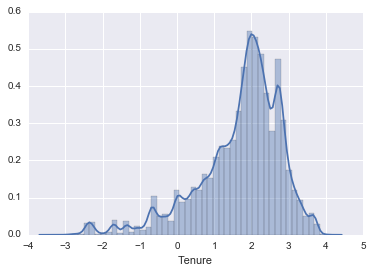

In [160]:
sns.distplot(np.log(data.Tenure))

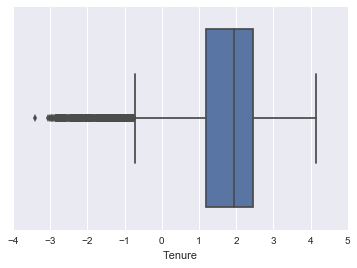

In [161]:
sns.boxplot(np.log(data.Tenure))

In [162]:
Q1 = np.percentile(np.log(data.Tenure), 25)
Q3 = np.percentile(np.log(data.Tenure), 75)
step = 1.5 * (Q3 - Q1)
print "Number of outliers for log transformed Tenure:", np.log(
    data.Tenure)[~((np.log(data.Tenure) >= Q1 - step) & (np.log(data.Tenure) <= Q3 + step))].shape[0]

Number of outliers for log transformed Tenure: 4539


Plot Age data distribution and boxplot.

Age data is normal distributed hence log transformation is not required.

There are 112 data instances can be considered as outliers. However considering the meaning of Age variable, it is unnecessary to remove outliers from it. Therefore I'm going to keep all outliers in this variable.

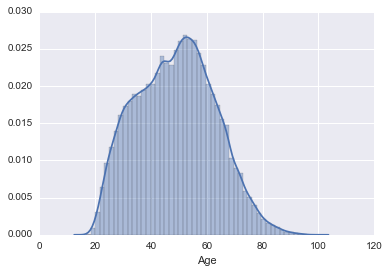

In [163]:
sns.distplot(data.Age)

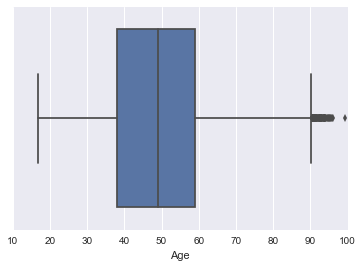

In [164]:
sns.boxplot(data.Age)

In [165]:
Q1 = np.percentile(data.Age, 25)
Q3 = np.percentile(data.Age, 75)
step = 1.5 * (Q3 - Q1)
print "Number of outliers for Age:", data.Age[
    ~((data.Age >= Q1 - step) & (data.Age <= Q3 + step))].shape[0]

Number of outliers for Age: 112


RTD_ST_CD variable has 51 unique values, which seems to indicate states of the US.

A sorted barplot is used to observe the averaged Call_Flag against RTD_ST_CD. Then four groups are cut from RTD_ST_CD based on the averaged Call_Flag. The reason is that getting 51 categorical dummies are creating way too many variables, so I'm going to getting three categorical dummies instead.

Then the columns DATE_FOR and RTD_ST_CD are dropped.

In [240]:
data.RTD_ST_CD.unique()

array(['ST_S0', 'ST_S1', 'ST_S2', 'ST_S3', 'ST_S4', 'ST_S5', 'ST_S6',
       'ST_S7', 'ST_S8', 'ST_S9', 'ST_S10', 'ST_S11', 'ST_S12', 'ST_S13',
       'ST_S14', 'ST_S15', 'ST_S16', 'ST_S17', 'ST_S18', 'ST_S19',
       'ST_S20', 'ST_S21', 'ST_S22', 'ST_S23', 'ST_S24', 'ST_S25',
       'ST_S26', 'ST_S27', 'ST_S28', 'ST_S29', 'ST_S30', 'ST_S31',
       'ST_S32', 'ST_S33', 'ST_S34', 'ST_S35', 'ST_S36', 'ST_S37',
       'ST_S38', 'ST_S39', 'ST_S40', 'ST_S41', 'ST_S42', 'ST_S43',
       'ST_S44', 'ST_S45', 'ST_S46', 'ST_S47', 'ST_S48', 'ST_S49', 'ST_S50'], dtype=object)

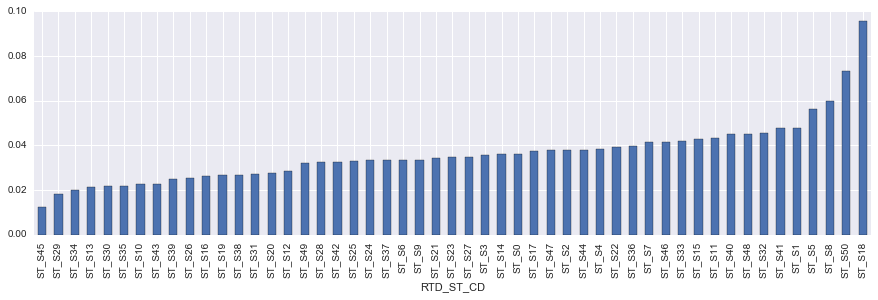

In [14]:
data.groupby("RTD_ST_CD")["Call_Flag"].mean().sort_values().plot(kind="bar", figsize=(15,4))

In [6]:
data = data.join(pd.cut(data.groupby(
            "RTD_ST_CD")["Call_Flag"].mean().sort_values(), 4, labels=[
            "0","1","2","3"]), on="RTD_ST_CD", rsuffix="_ST")
data.drop(["DATE_FOR", "RTD_ST_CD"], axis=1, inplace=True)

Get dummies for categorical variables.

In [7]:
data_1 = pd.get_dummies(data['CustomerSegment'], prefix='CustomerSegment', drop_first=True).astype('bool')
data_2 = pd.get_dummies(data['MART_STATUS'], prefix='MART_STATUS', drop_first=True).astype('bool')
data_3 = pd.get_dummies(data['GENDER'], prefix='GENDER', drop_first=True).astype('bool')
data_4 = pd.get_dummies(data['Call_Flag_ST'], prefix='RTD_ST_CD', drop_first=True).astype('bool')
data.drop(['CustomerSegment','MART_STATUS','GENDER','Call_Flag_ST'], axis=1, inplace=True)
data = pd.concat([data, data_1, data_2, data_3, data_4], axis=1)

Check correlation between variables with 6M and 3M.

It shows that all CHANNEL_6M variables are highly correlated (r > 0.85) to CHANNEL_3M variables. To avoid multicollinearity, all CHANNEL_6M variables will be dropped.

For the same reason, METHOD1_6M, PAYMENTS_6M can also be dropped.

EVENT1_30_FLAG has only one unique value, which is zero. This variable will be dropped.

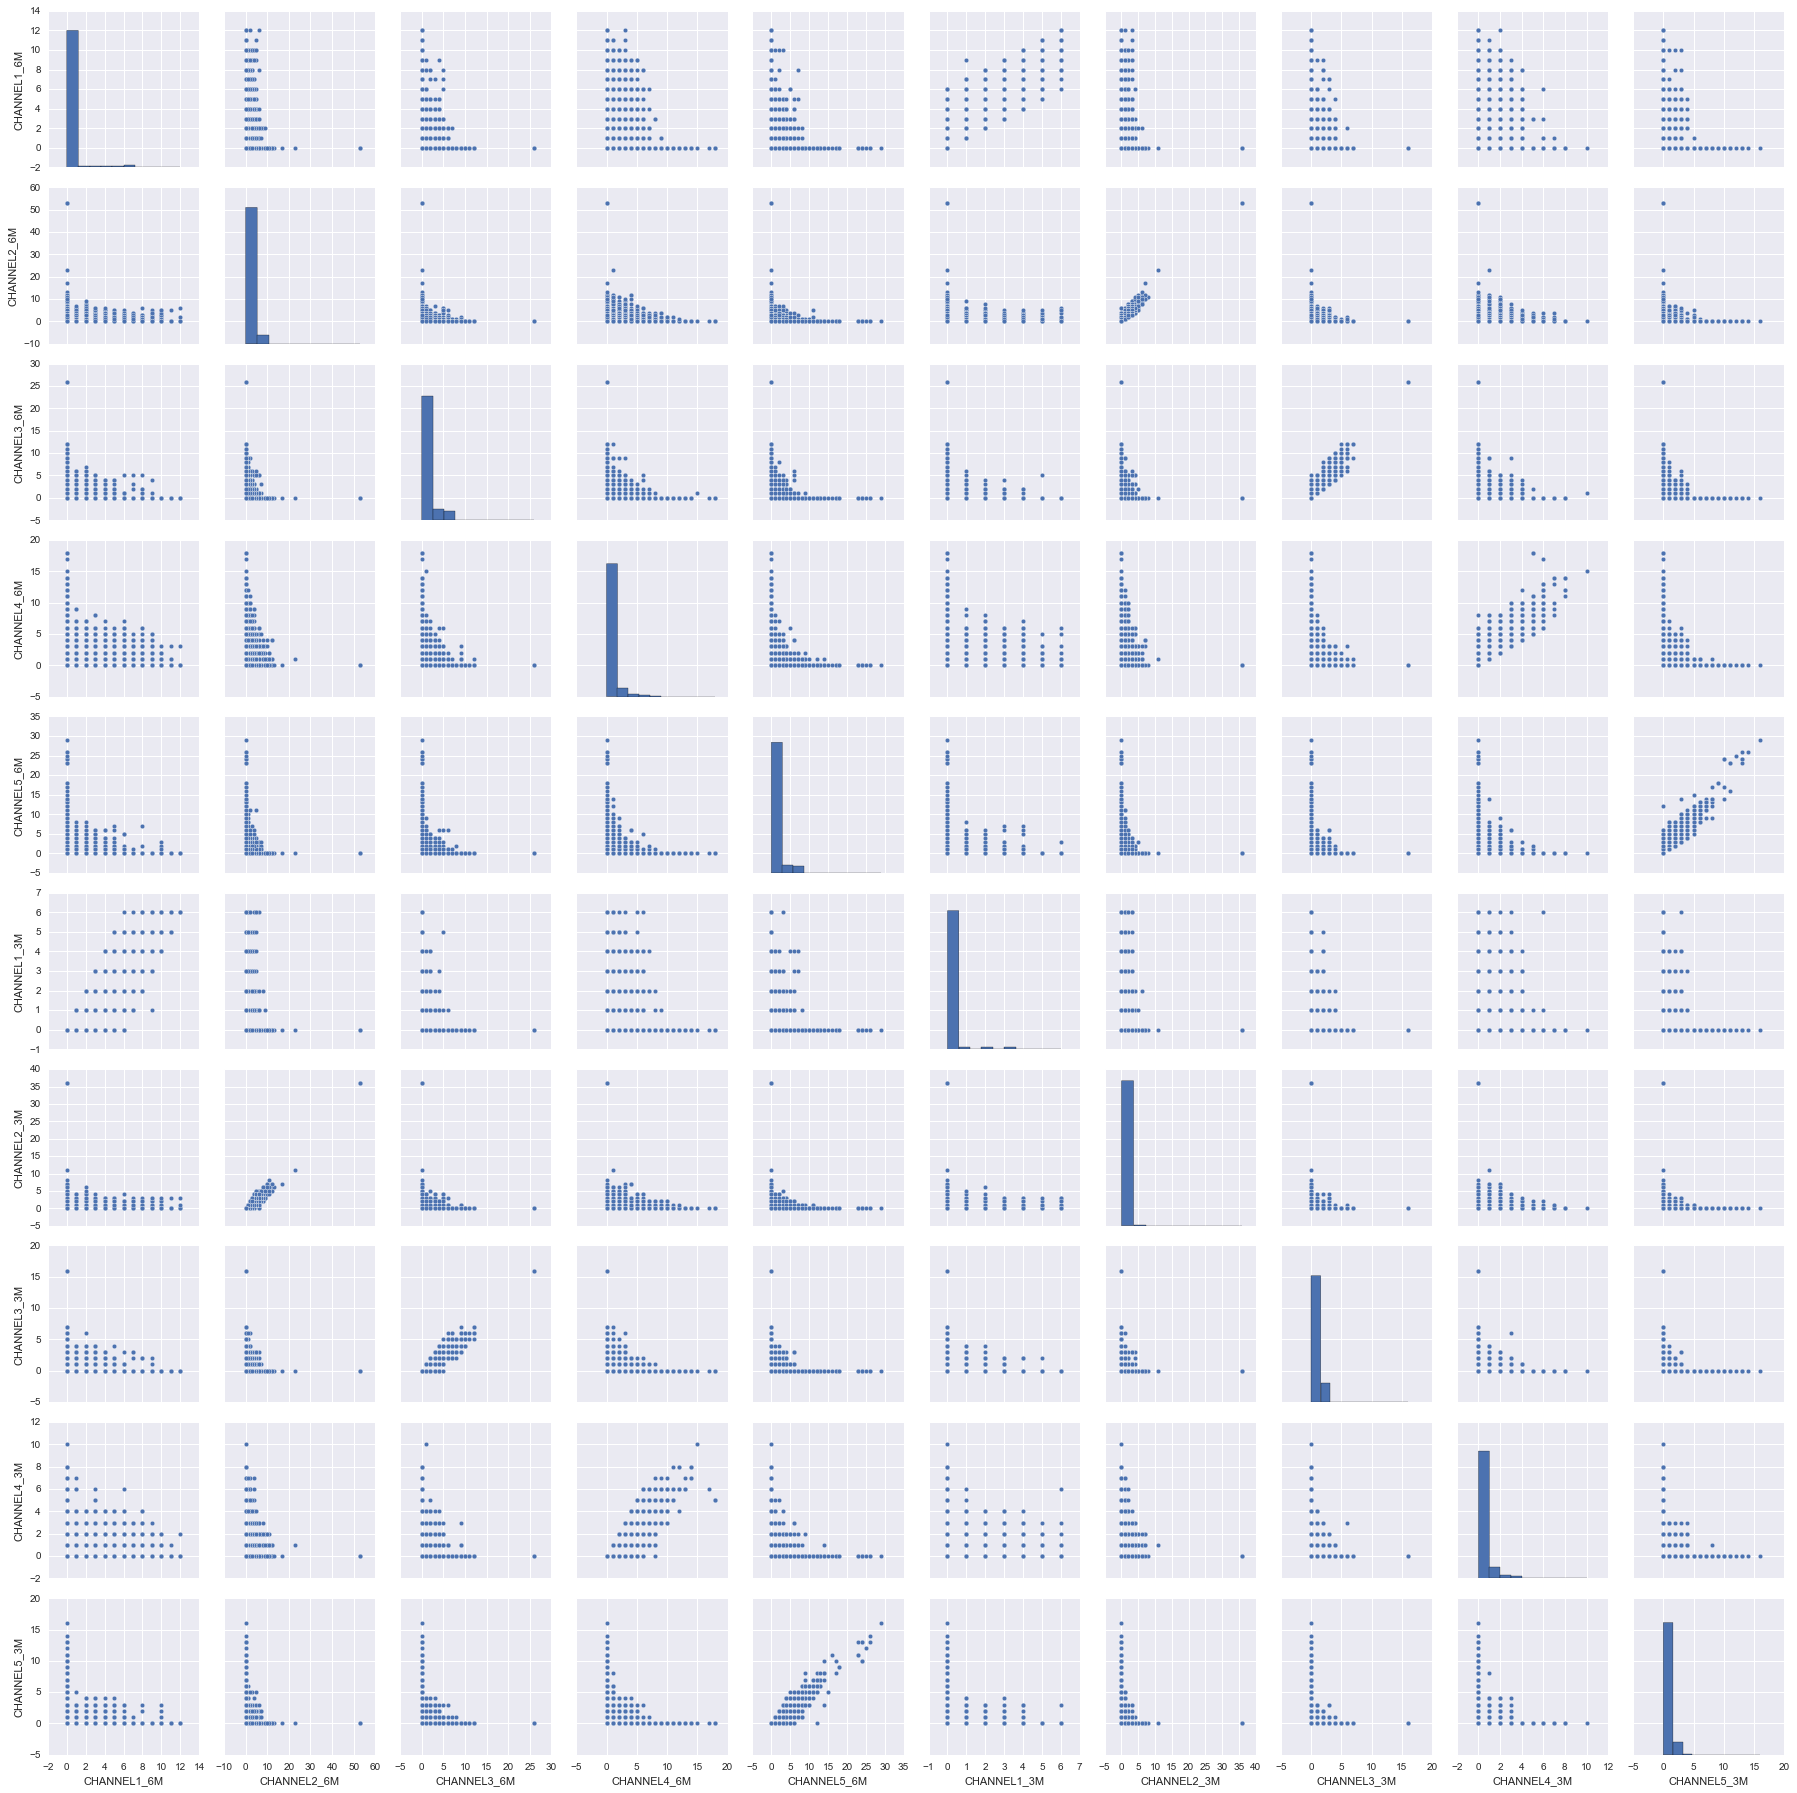

In [181]:
sns.pairplot(data.iloc[:,[2,3,4,5,6,10,11,12,13,14]])

In [244]:
data.iloc[:,[2,3,4,5,6,10,11,12,13,14]].corr()

,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M
CHANNEL1_6M,1.000000,-0.086003,-0.098335,0.041458,-0.075422,0.904554,-0.072783,-0.089943,0.060785,-0.068647
CHANNEL2_6M,-0.086003,1.000000,-0.188392,0.042378,-0.161057,-0.078562,0.949437,-0.182217,0.029161,-0.153988
CHANNEL3_6M,-0.098335,-0.188392,1.000000,-0.123164,-0.148084,-0.086446,-0.174720,0.964903,-0.107430,-0.140859
CHANNEL4_6M,0.041458,0.042378,-0.123164,1.000000,-0.111875,0.027828,0.050986,-0.117888,0.876719,-0.106143
CHANNEL5_6M,-0.075422,-0.161057,-0.148084,-0.111875,1.000000,-0.066334,-0.152373,-0.142800,-0.098227,0.965934
CHANNEL1_3M,0.904554,-0.078562,-0.086446,0.027828,-0.066334,1.000000,-0.069116,-0.080660,0.036840,-0.062010
CHANNEL2_3M,-0.072783,0.949437,-0.174720,0.050986,-0.152373,-0.069116,1.000000,-0.176081,0.005932,-0.148856
CHANNEL3_3M,-0.089943,-0.182217,0.964903,-0.117888,-0.142800,-0.080660,-0.176081,1.000000,-0.110461,-0.137846
CHANNEL4_3M,0.060785,0.029161,-0.107430,0.876719,-0.098227,0.036840,0.005932,-0.110461,1.000000,-0.096515
CHANNEL5_3M,-0.068647,-0.153988,-0.140859,-0.106143,0.965934,-0.062010,-0.148856,-0.137846,-0.096515,1.000000


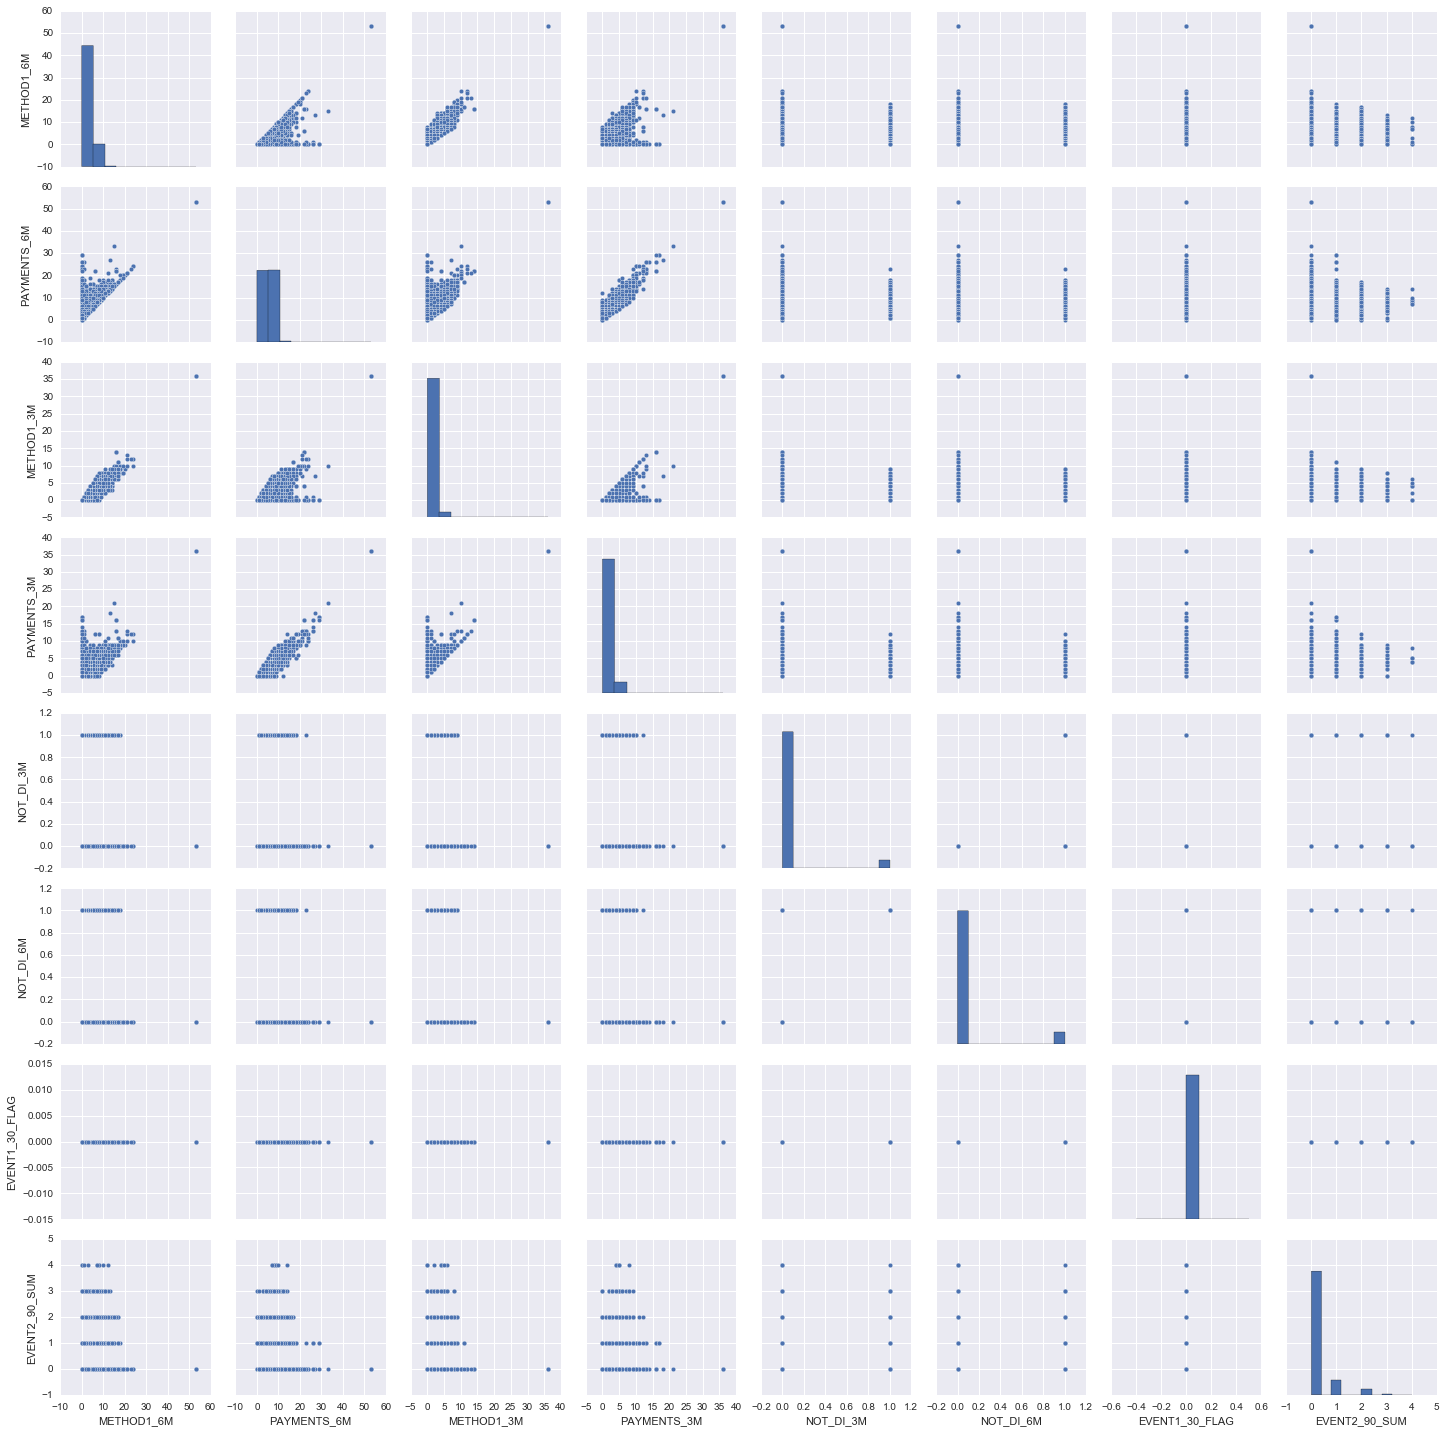

In [183]:
sns.pairplot(data.iloc[:,[7,9,15,16,17,18,19,20]])

In [184]:
data.iloc[:,[7,9,15,16,17,18,19,20]].corr()

,METHOD1_6M,PAYMENTS_6M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM
METHOD1_6M,1.000000,0.399356,0.943204,0.343044,0.257073,0.305508,NaN,0.160784
PAYMENTS_6M,0.399356,1.000000,0.384838,0.867143,0.158400,0.188963,NaN,0.152888
METHOD1_3M,0.943204,0.384838,1.000000,0.431786,0.280022,0.286438,NaN,0.170943
PAYMENTS_3M,0.343044,0.867143,0.431786,1.000000,0.198031,0.175270,NaN,0.182851
NOT_DI_3M,0.257073,0.158400,0.280022,0.198031,1.000000,0.823334,NaN,0.071951
NOT_DI_6M,0.305508,0.188963,0.286438,0.175270,0.823334,1.000000,NaN,0.141261
EVENT1_30_FLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVENT2_90_SUM,0.160784,0.152888,0.170943,0.182851,0.071951,0.141261,NaN,1.000000


In [8]:
print data.EVENT1_30_FLAG.unique()
data.drop(['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M',
           'METHOD1_6M','PAYMENTS_6M','EVENT1_30_FLAG'], axis=1, inplace=True)
data[['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']] = data[
    ['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']].astype('bool')

[0]


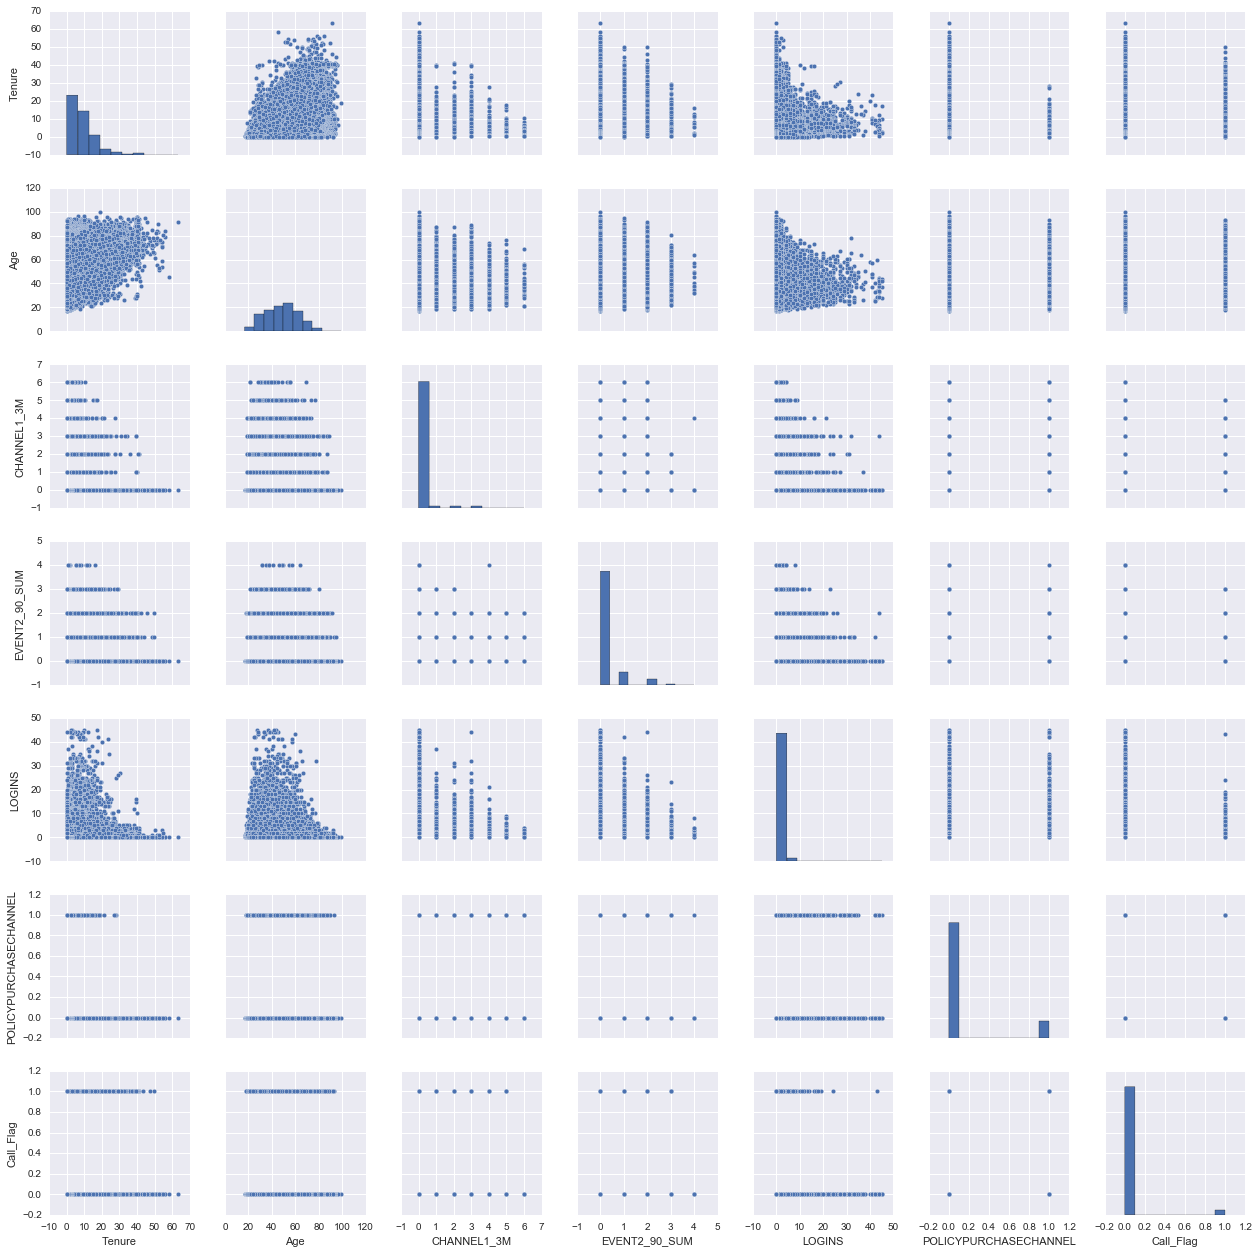

In [23]:
sns.pairplot(data.iloc[:,[0,1,3,12,13,14,15]])

# Modeling

In [15]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, LassoCV
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.pylab import rcParams

In [10]:
X_all = data.drop("Call_Flag", axis=1)
y_all = data["Call_Flag"]
train_index, test_index = next(iter(StratifiedShuffleSplit(y_all,test_size=0.25,random_state=seed)))
X_train, X_test = np.array(X_all)[train_index,:], np.array(X_all)[test_index,:]
y_train, y_test = np.array(y_all)[train_index], np.array(y_all)[test_index]

score = make_scorer(roc_auc_score)

def train_predict(clf, X_train, y_train, X_test, y_test):
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    clf.fit(X_train, y_train)
    print "AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "AUC score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return roc_auc_score(target, y_pred)

In [293]:
parameters = {'n_estimators':(10,15,20),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}

clf_B = RandomForestClassifier(random_state=seed, warm_start=False, class_weight='balanced')
grid_obj = GridSearchCV(clf_B, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
clf_B = grid_obj.best_estimator_
print clf_B.get_params(), '\n'
print "Tuned model has a training AUC score of {:.4f}.".format(predict_labels(clf_B, X_train, y_train))
print "Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(clf_B, X_test, y_test))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   37.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:  3.1min finished


{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 42, 'max_features': 'auto', 'max_depth': None, 'class_weight': 'balanced'} 

Tuned model has a training AUC score of 0.9176.
Tuned model has a testing AUC score of 0.6311.


In [294]:
print classification_report(y_test, clf_B.predict(X_test))

             precision    recall  f1-score   support

      False       0.97      0.95      0.96     31139
       True       0.20      0.31      0.24      1181

avg / total       0.94      0.93      0.94     32320



In [295]:
print confusion_matrix(y_test, clf_B.predict(X_test))

[[29653  1486]
 [  815   366]]


In [299]:
parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.1,1.0),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}

clf_A = GradientBoostingClassifier(random_state=seed, warm_start=False)
grid_obj = GridSearchCV(clf_A, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
clf_A = grid_obj.best_estimator_
print clf_A.get_params(), '\n'
print "Tuned model has a training AUC score of {:.4f}.".format(predict_labels(clf_A, X_train, y_train))
print "Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(clf_A, X_test, y_test))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 27.3min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed: 30.5min finished


{'presort': 'auto', 'loss': 'deviance', 'verbose': 0, 'subsample': 1.0, 'max_leaf_nodes': None, 'learning_rate': 1.0, 'warm_start': False, 'min_samples_leaf': 2, 'n_estimators': 100, 'min_samples_split': 2, 'init': None, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'max_features': None, 'max_depth': 3} 

Tuned model has a training AUC score of 0.5859.
Tuned model has a testing AUC score of 0.5586.


In [300]:
print classification_report(y_test, clf_A.predict(X_test))

             precision    recall  f1-score   support

      False       0.97      0.99      0.98     31139
       True       0.35      0.13      0.19      1181

avg / total       0.95      0.96      0.95     32320



In [40]:
parameters = {'solver':('sag','newton-cg','lbfgs','sag')}

clf_C = LogisticRegressionCV(Cs=10, cv=4, scoring=score, penalty='l2', random_state=seed, class_weight='balanced')
grid_obj = GridSearchCV(clf_C, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
clf_C = grid_obj.best_estimator_
print clf_C.get_params(), '\n'
print "Tuned model has a training AUC score of {:.4f}.".format(predict_labels(clf_C, X_train, y_train))
print "Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(clf_C, X_test, y_test))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/Users/HangYao/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/HangYao/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/HangYao/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/HangYao/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:  5.4min finished


{'scoring': make_scorer(roc_auc_score), 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1.0, 'fit_intercept': True, 'max_iter': 100, 'refit': True, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': 42, 'dual': False, 'tol': 0.0001, 'Cs': 10, 'solver': 'lbfgs', 'cv': 4, 'class_weight': 'balanced'} 

Tuned model has a training AUC score of 0.7669.
Tuned model has a testing AUC score of 0.7628.


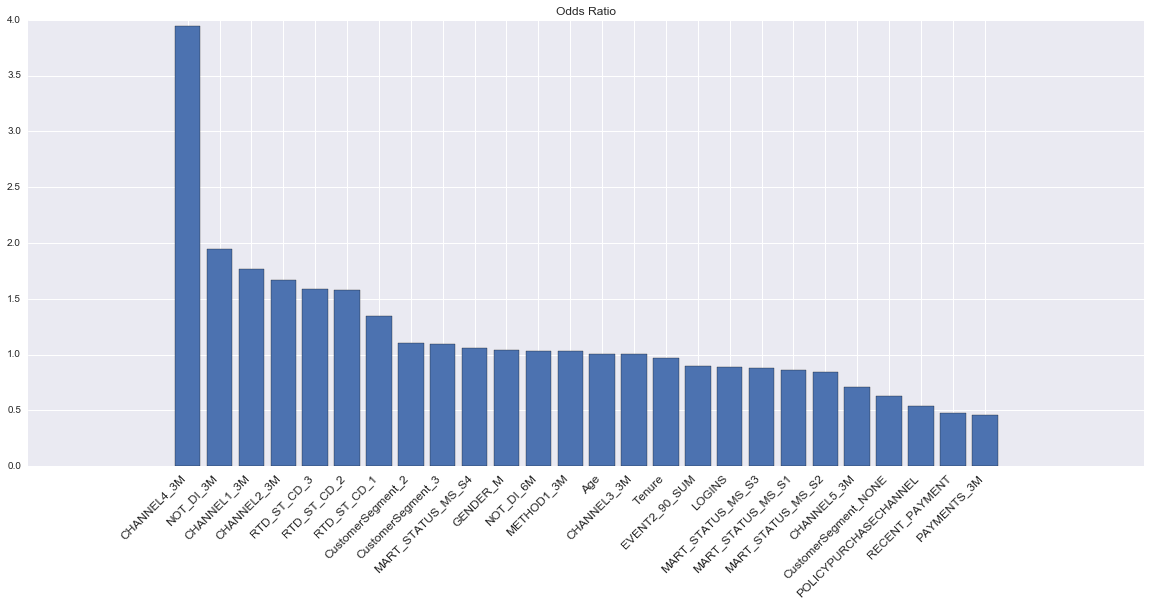

In [33]:
result = np.stack((np.array(list(X_all.columns)), np.exp(clf_C.coef_.flatten())), axis=1)
result_1 = [tuple(l) for l in result]
result_2 = sorted(result_1, key=lambda tup: tup[1], reverse=True)
result_3 = zip(*result_2)
rcParams['figure.figsize'] = 20, 8
figure = plt.figure()
plt.bar(range(len(result_3[1])),result_3[1],align='center')
plt.xticks(range(len(result_3[1])), result_3[0], size=12)
plt.setp(plt.xticks()[1], rotation=45, ha='right')
plt.title('Odds Ratio')
plt.show()

In [307]:
clf_D = RidgeClassifierCV(alphas=(1e-5,1e-4,1e-3,1e-2,0.1,1.0,10.0),
                          normalize=True, scoring=score, cv=4, class_weight='balanced')
clf_D = clf_D.fit(X_train, y_train)
print "Tuned model has a training AUC score of {:.4f}.".format(predict_labels(clf_D, X_train, y_train))
print "Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(clf_D, X_test, y_test))

Tuned model has a training AUC score of 0.7634.
Tuned model has a testing AUC score of 0.7620.


In [359]:
parameters = {'n_neighbors':(5,10,15,20),
              'weights':('uniform','distance'),
              'p':(1,2)}

clf_F = KNeighborsClassifier()
grid_obj = GridSearchCV(clf_F, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
clf_F = grid_obj.best_estimator_
print clf_F.get_params(), '\n'
print "Tuned model has a training AUC score of {:.4f}.".format(predict_labels(clf_F, X_train, y_train))
print "Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(clf_F, X_test, y_test))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:  4.6min finished


{'n_neighbors': 5, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 1, 'weights': 'distance', 'leaf_size': 30} 

Tuned model has a training AUC score of 0.9970.
Tuned model has a testing AUC score of 0.5335.


In [45]:
model = SelectFromModel(clf_C, prefit=True)
X_new = model.transform(X_all)
print "Reduced feature number:", X_new.shape[1]
print X_all.columns[model.get_support()]

Reduced feature number: 11
Index([u'RECENT_PAYMENT', u'CHANNEL1_3M', u'CHANNEL2_3M', u'CHANNEL4_3M',
       u'CHANNEL5_3M', u'PAYMENTS_3M', u'NOT_DI_3M', u'POLICYPURCHASECHANNEL',
       u'CustomerSegment_NONE', u'RTD_ST_CD_2', u'RTD_ST_CD_3'],
      dtype='object')


In [46]:
Xn_train, Xn_test = np.array(X_new)[train_index,:], np.array(X_new)[test_index,:]
clfn_C = clf_C
clfn_C = clfn_C.fit(Xn_train, y_train)

print "Tuned model has a training AUC score of {:.4f}.".format(predict_labels(clfn_C, Xn_train, y_train))
print "Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(clfn_C, Xn_test, y_test))

Tuned model has a training AUC score of 0.7585.
Tuned model has a testing AUC score of 0.7610.
